# Prepare EDS data for tensor SVD
Atomic resolution EDS data collected from SuperSTEM in UK, previously used for NLPCA test.
<br>Preliminary test suggest that by using the raw data with 1000 channels, there are too little signal within each channel and tensor SVD cannot identify any structure, denoising performance is poor.

In [2]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

In [5]:
data = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/EDS_rawdata.mat')
data = data['datacube']

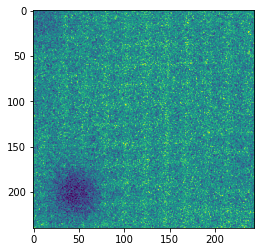

In [6]:
plt.imshow(np.sum(data,axis=2))

In [22]:
ichannel

1000

In [23]:
factor_list = [10,20,30,40,50]
for ifactor in range(len(factor_list)):
    factor = factor_list[ifactor] # downsampling factor
    ichannel = 0
    new_cube = []
    while ichannel < data.shape[2] - factor:
        frame = np.zeros((data.shape[0],data.shape[1]))
        for iframe in range(factor):
            frame = frame + data[:,:,ichannel]
            ichannel = ichannel + 1
        new_cube.append(frame)
    new_cube = np.asarray(new_cube)
    new_cube = np.transpose(new_cube, (1, 2, 0))

    # save as Matlab .mat file
    # Create a dictionary
    adict = {}
    adict['datacube'] = new_cube

    sio.savemat('/srv/home/chenyu/TensorDenoise/Experiment/EDS_dowsampled_factor_'+str(factor)+'.mat', adict)

(240, 244, 200)


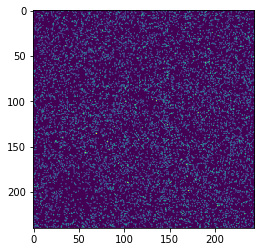

In [20]:
print(new_cube.shape)
plt.imshow(new_cube[:,:,100])